<a href="https://colab.research.google.com/github/TotoroBytes/data-visualization-repo/blob/main/ntb_p25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definicija problema

Tema projekta, odnosno problem koji rešavamo koristeći algoritme mašinskog učenja je predviđanje(predikcija) prodaje tipa i količine kafe na osnovu podataka o prodaji kafe iz različitih vrsta aparata za kafu.Na osnovu podataka iz dataseta želimo da napravimo projekciju buduće prodaje, odnosno koje vrste kafe će biti najprodavanije i koliko tačno novca ćemo zaraditi prodajom kafe u nekom budućem ciklusu poslovanja.
Proces modeliranja u ovom projektu može biti od velike pomoći, kako prodavnicama široke potrošenje, tako i specijalizovanim kompanijama za prodaju kafe, radi eventualnog predviđanja buduće prodaje njihovih proizvoda .Potražnju za kafom je teško proceniti, iz razloga što mnogo različitih faktora utiče na nju, i svi su na neki način međusobno povezani(ekonomski faktori, demografski, klimatski faktori i faktori krupnih globalnih promena).Obrasci mašinskog učenja mogu pronaći skrivene šablone i predvideti buduće ishode na bazi podataka koji su kreirani na osnovu događaja iz prošlosti.Npr. Starbucks je kreirao mnoge modele mašinskog učenja koji im pomažu u poslovanju i koji su kreirani na bazi velike količine podataka koje poseduju.Menadžeri koriste modele mašinskog učenja kako bi utvrdili tačnu količinu kafe koja im je potrebna u prodavnici svake nedelje.


# 2. Prikupljanje podataka

Skup podataka,ili dataset,  na kojem se bazira projekat je Coffee Sales dataset, javni skup podataka koji se nalazi na *kaggle.com* repozitorijumu.Coffee Sales skup podataka sadrži detaljne podatke o prodaji iz različitih aparata za prodaju kafe.Skup podataka je otvorenog tipa, a a autor dataset-a je Yaroslav Isaienkov (@ihelon).Coffee Sales skup podataka sadrži podatke o prodaji određenih proizvoda(Retail)i sastoji se iz čistih podataka(Clean data) Pogodan je za učenje primene modela mašinskog učenja ,  i nad ovim podacima možemo vršiti eksploratornu analizu podataka, predikciju i druge vrste modeliranja.

# 3. Analiza i vizualizacija  podataka
U ovom poglavlju bavićemo se osnovnom analizom podataka(učitavanje i analiza skupa podataka) i vizualizacijom podataka.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv('index.csv')
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1459,2024-09-05,2024-09-05 20:30:14.964,card,ANON-0000-0000-0587,32.82,Cappuccino
1460,2024-09-05,2024-09-05 20:54:24.429,card,ANON-0000-0000-0588,23.02,Americano
1461,2024-09-05,2024-09-05 20:55:31.429,card,ANON-0000-0000-0588,32.82,Cappuccino
1462,2024-09-05,2024-09-05 21:26:28.836,card,ANON-0000-0000-0040,27.92,Americano with Milk


In [ ]:
# prvih deset redova dataset-a
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [ ]:
# kolone skupa podataka
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [ ]:
# osnovne informacije o dataset-u, kao što su kolone i tipovi podataka u kolonama, broj non-null podataka, itd.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


In [ ]:
# statistički podaci o dataset-u, kao što su srednja vrednost, standardna devijaciji, minimalna vrednost i kvartili dataset-a
df.describe()

,money
count,1464.000000
mean,32.013661
std,5.317022
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,40.000000


In [ ]:
# proveravamo da li se u dataset-u nalaza duplirani podaci i  ukupan broj duplikata
df.duplicated().sum()

0

In [ ]:
# proveravamo da li se u dataset-u nalaza null podaci
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
# kategorijske (kvantitativne) kolone i jedinstvene vrednosti
categorical_columns = ['cash_type', 'coffee_name']

for column in categorical_columns:
  unique_values = df[column].unique()
  print(f"Unique values in '{column}' : {unique_values}\n")

Unique values in 'cash_type' : ['card' 'cash']

Unique values in 'coffee_name' : ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']



Vizualizacija podataka

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

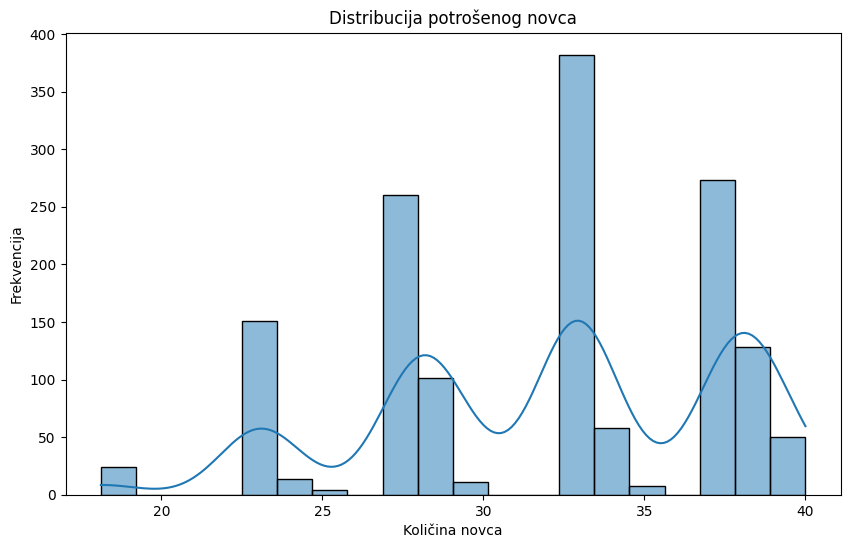

In [ ]:
# Distribucija potrošenog novca

plt.figure(figsize = (10, 6))
sns.histplot(df['money'], bins=20, kde=True)
plt.title('Distribucija potrošenog novca')
plt.xlabel('Količina novca')
plt.ylabel('Frekvencija')
plt.show()

<ipython-input-13-68b49f8ca307>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'coffee_name', data=df, order=df['coffee_name'].value_counts().index, palette = 'Blues')


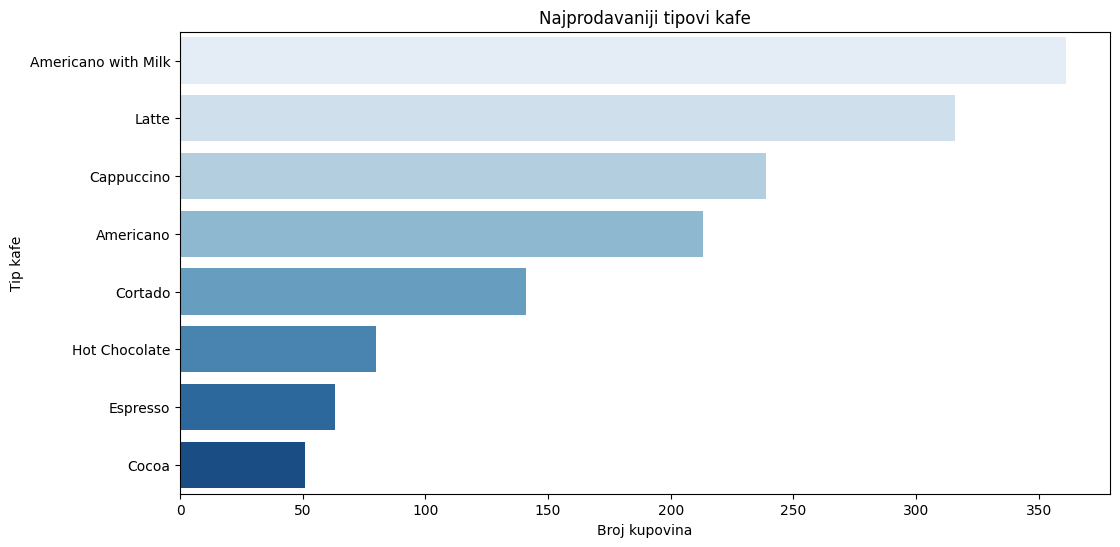

In [ ]:
# Vizualizacija podataka
# Najprodavaniji tipovi kafe

plt.figure(figsize = (12, 6))
sns.countplot(y = 'coffee_name', data=df, order=df['coffee_name'].value_counts().index, palette = 'Blues')
plt.title('Najprodavaniji tipovi kafe')
plt.xlabel('Broj kupovina')
plt.ylabel('Tip kafe')
plt.show()

<ipython-input-14-e5fa5f1d35f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'month', data=df, palette = 'BuGn')


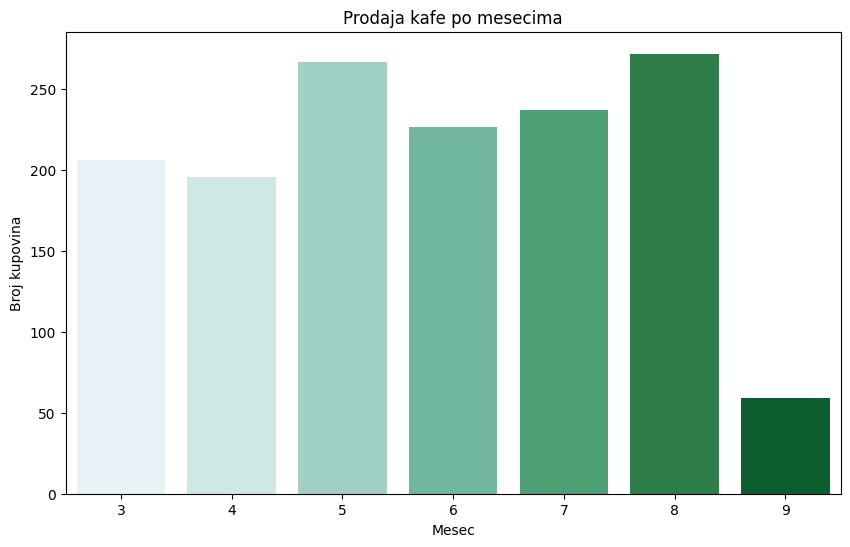

In [ ]:
# Broj kupovina kafe po mesecu godine

plt.figure(figsize = (10, 6))
sns.countplot(x = 'month', data=df, palette = 'BuGn')
plt.title('Prodaja kafe po mesecima')
plt.xlabel('Mesec')
plt.ylabel('Broj kupovina')
plt.show()

<ipython-input-15-d969fea91975>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y = 'money', data=df, palette='viridis', linewidth=2)


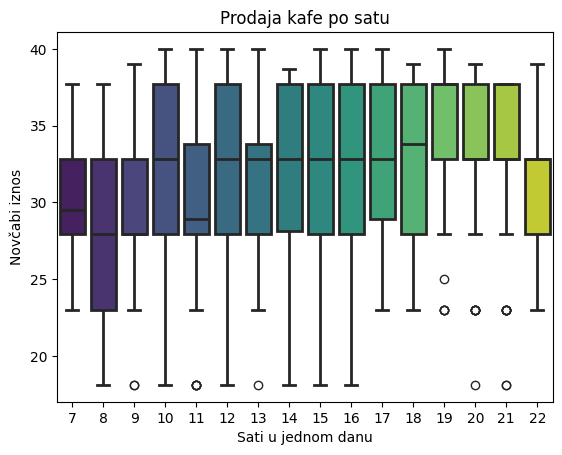

In [ ]:
# frekvencija prodaje kafe po satu

sns.boxplot(x='hour', y = 'money', data=df, palette='viridis', linewidth=2)
plt.title('Prodaja kafe po satu')
plt.xlabel('Sati u jednom danu')
plt.ylabel('Novčani iznos')
plt.grid(False)

plt.show()

Text(0, 0.5, 'Broj kupovina')

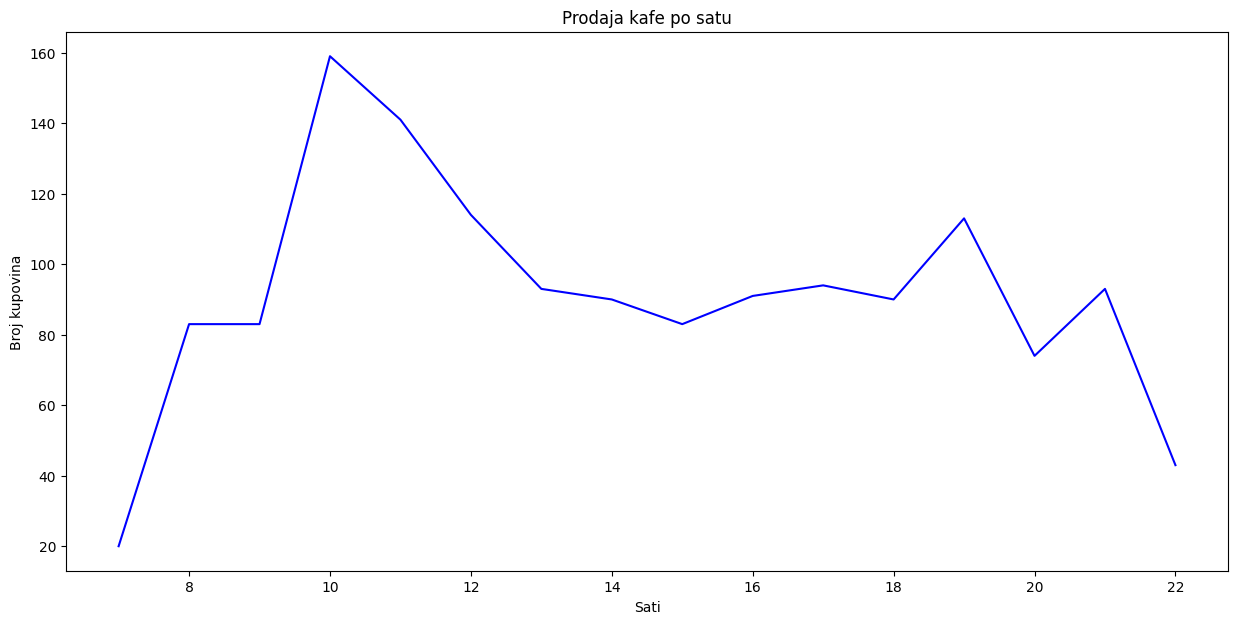

In [ ]:
df.groupby('hour').size().plot(kind = "line", figsize = (15,7), color = 'blue')
plt.title('Prodaja kafe po satu')
plt.xlabel('Sati')
plt.ylabel('Broj kupovina')

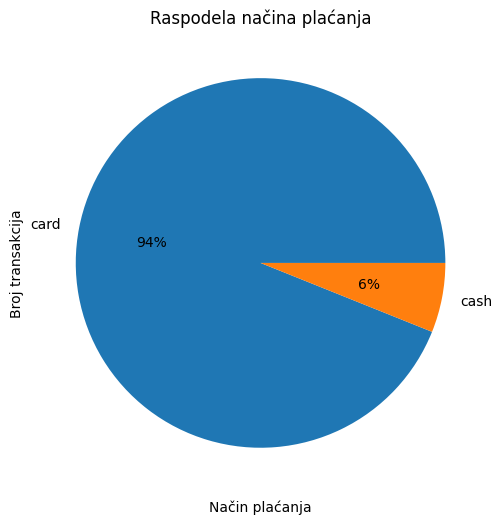

In [ ]:
# načini plaćanja

payment_distribution = df['cash_type'].value_counts()

plt.figure(figsize=(10, 6))
payment_distribution.plot(kind='pie', autopct = '%1.0f%%')
plt.title('Raspodela načina plaćanja')
plt.xlabel('Način plaćanja')
plt.ylabel('Broj transakcija')
plt.show()

# 4. Predobrada podataka

In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,13
...,...,...,...,...,...,...,...,...,...
1459,2024-09-05,2024-09-05 20:30:14.964,card,ANON-0000-0000-0587,32.82,Cappuccino,9,5,20
1460,2024-09-05,2024-09-05 20:54:24.429,card,ANON-0000-0000-0588,23.02,Americano,9,5,20
1461,2024-09-05,2024-09-05 20:55:31.429,card,ANON-0000-0000-0588,32.82,Cappuccino,9,5,20
1462,2024-09-05,2024-09-05 21:26:28.836,card,ANON-0000-0000-0040,27.92,Americano with Milk,9,5,21


In [ ]:
# Uklanjamo kolone koje nam nisu potrebne za obradu podataka
df.drop(columns = ['date', 'datetime', 'card'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cash_type    1464 non-null   object 
 1   money        1464 non-null   float64
 2   coffee_name  1464 non-null   object 
 3   month        1464 non-null   int32  
 4   day          1464 non-null   int32  
 5   hour         1464 non-null   int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 51.6+ KB


In [ ]:
# Vršimo encoding podataka, odnosno kolona
# LabelEncoder encoding
label_encoder = LabelEncoder()
df['cash_type'] = label_encoder.fit_transform(df['cash_type'])

# One Hot Encoding
df = pd.get_dummies(df, columns = ['coffee_name'], drop_first=True)

coffee_name_columns = [col for col in df.columns if 'coffee_name' in col]
df[coffee_name_columns] = df[coffee_name_columns].astype(int)

In [ ]:
df

,cash_type,money,month,day,hour,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,0,38.70,3,1,10,0,0,0,0,0,0,1
1,0,38.70,3,1,12,0,0,0,0,0,1,0
2,0,38.70,3,1,12,0,0,0,0,0,1,0
3,0,28.90,3,1,13,0,0,0,0,0,0,0
4,0,38.70,3,1,13,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0,32.82,9,5,20,0,1,0,0,0,0,0
1460,0,23.02,9,5,20,0,0,0,0,0,0,0
1461,0,32.82,9,5,20,0,1,0,0,0,0,0
1462,0,27.92,9,5,21,1,0,0,0,0,0,0


# 5. Izbor algoritama/modela
Koristićemo train test split tehniku mašinskog učenja da bi simulirali ponašanje modela na novim podacima.Razdvojićemo podatke na dva skupa: trening skup i test skup.Na trening skupu podata treniramo model, dok na test skupu podataka treniramo tačnost modela

In [ ]:
X = df.drop(columns = ['money'])
y = df['money']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Treniranje i evaluacija modela

Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
predictions = rf.predict(X_test)
errors = abs(predictions - y_test)
print('Mean absolute error:', round(np.mean(errors), 2), 'degrees')

Mean absolute error: 1.26 degrees


In [ ]:
mape = 100 * (errors/y_test)
np.mean(mape)

4.1656451037657565

In [ ]:
accuracy = 100 - np.mean(mape)
print('Tačnost:', round(accuracy, 2), '%')

Tačnost: 95.83 %


In [ ]:
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 4.69759070461081


In [ ]:
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.8300172721570096


In [ ]:
from sklearn.tree import plot_tree

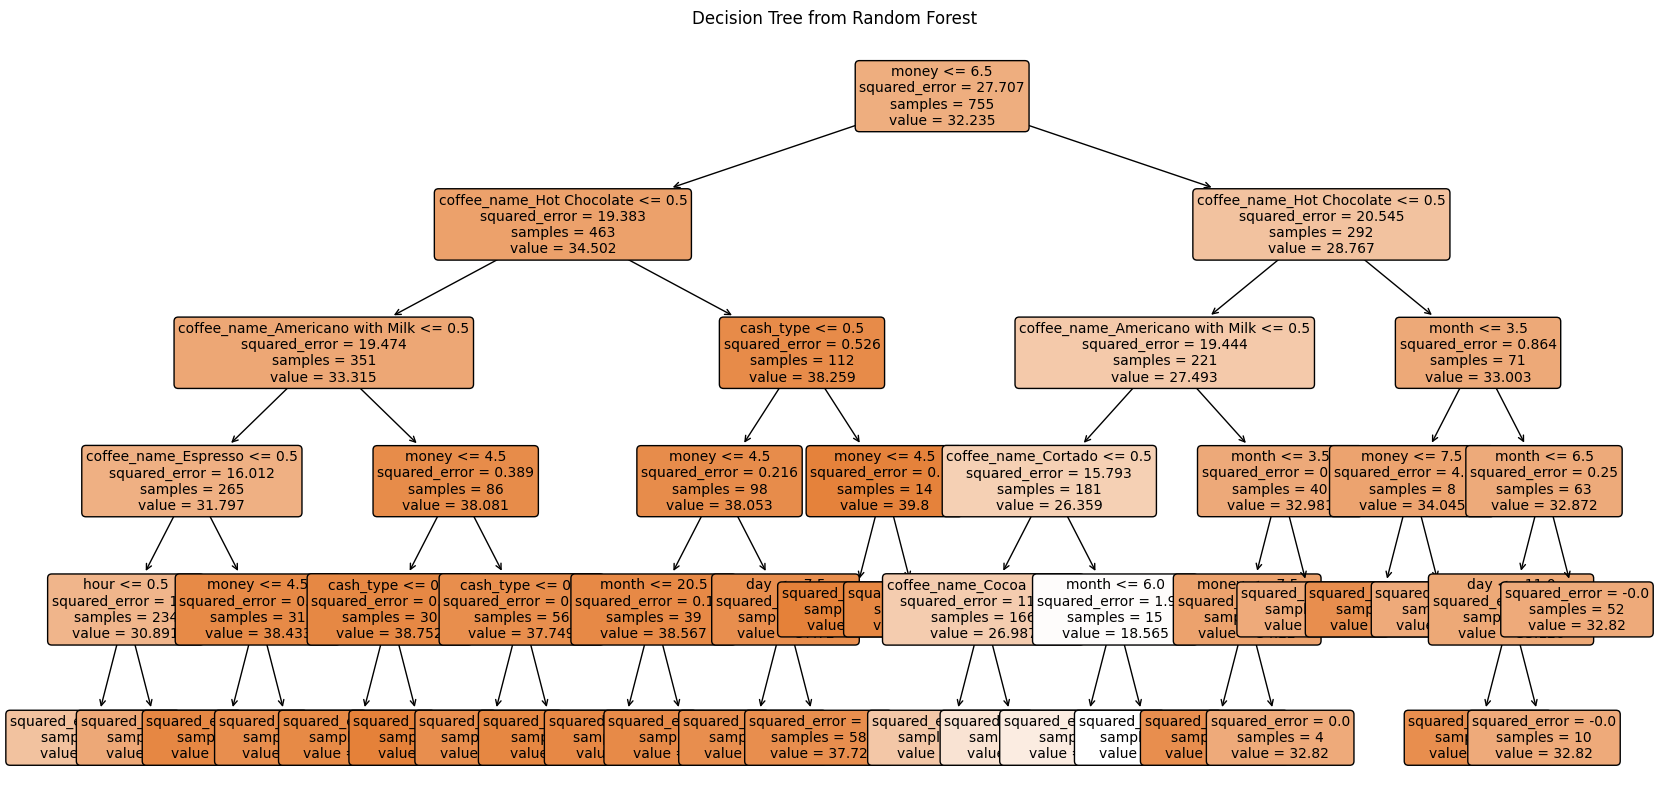

In [ ]:
tree_to_plot = rf.estimators_[5]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

Decission Tree Regresor

In [ ]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=2529)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [ ]:
print('Rezultat treniranja modela je:', dtr.score(X_train, y_train) * 100, '%')

Rezultat treniranja modela je: 59.6696246722507 %


In [ ]:
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)

{'fit_time': array([0.00780988, 0.00528073, 0.00760341, 0.00458121, 0.0035758 ]),
 'score_time': array([0.00296903, 0.00388145, 0.0054512 , 0.00209999, 0.00200844]),
 'test_score': array([0.60575558, 0.61559561, 0.5675826 , 0.61055054, 0.52916841])}

In [ ]:
print('Rezultat testiranja modela je:', dtr.score(X_test, y_test))

Rezultat testiranja modela je: 0.5334007283723108


In [ ]:
# Pocinjemo proces poboljšanja tačnosti modela putem hiperparametara
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2529,
 'splitter': 'best'}

In [ ]:
# Vrsimo selekciju hiperparametara

params = {'model__max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
          'model__criterion' : ['squared_error', 'absolute_error'],
          'model__random_state' : [2529]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('model', dtr)])
grid = GridSearchCV(pipe, params, cv=5)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [ ]:
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 10,
 'model__random_state': 2529}

In [ ]:
best = grid.best_estimator_

In [ ]:
best.fit(X_train, y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=10, random_state=2529))])

In [ ]:
y_pred = best.predict(X_test)

In [ ]:
#mean absolute error
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

Mean absolute error: 0.06789497688816365


In [ ]:
# Mean absolute percentage error
print('Mean absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred))

Mean absolute percentage error: 0.0019064704796626117


In [ ]:
# R-squared
print('R-squared', r2_score(y_test, y_pred))

R-squared 0.9932892988256363


[Text(0.5, 0.875, 'month <= 6.5\nsquared_error = 28.399\nsamples = 1171\nvalue = 32.05'),
 Text(0.25, 0.625, 'coffee_name_Espresso <= 0.5\nsquared_error = 20.678\nsamples = 713\nvalue = 34.229'),
 Text(0.125, 0.375, 'coffee_name_Cortado <= 0.5\nsquared_error = 16.776\nsamples = 685\nvalue = 34.659'),
 Text(0.0625, 0.125, 'squared_error = 14.123\nsamples = 620\nvalue = 35.304'),
 Text(0.1875, 0.125, 'squared_error = 0.37\nsamples = 65\nvalue = 28.515'),
 Text(0.375, 0.375, 'month <= 4.5\nsquared_error = 0.491\nsamples = 28\nvalue = 23.688'),
 Text(0.3125, 0.125, 'squared_error = 0.204\nsamples = 14\nvalue = 24.286'),
 Text(0.4375, 0.125, 'squared_error = 0.064\nsamples = 14\nvalue = 23.09'),
 Text(0.75, 0.625, 'coffee_name_Latte <= 0.5\nsquared_error = 21.525\nsamples = 458\nvalue = 28.658'),
 Text(0.625, 0.375, 'coffee_name_Cappuccino <= 0.5\nsquared_error = 20.369\nsamples = 353\nvalue = 27.365'),
 Text(0.5625, 0.125, 'squared_error = 15.485\nsamples = 288\nvalue = 26.065'),
 Text(0.6

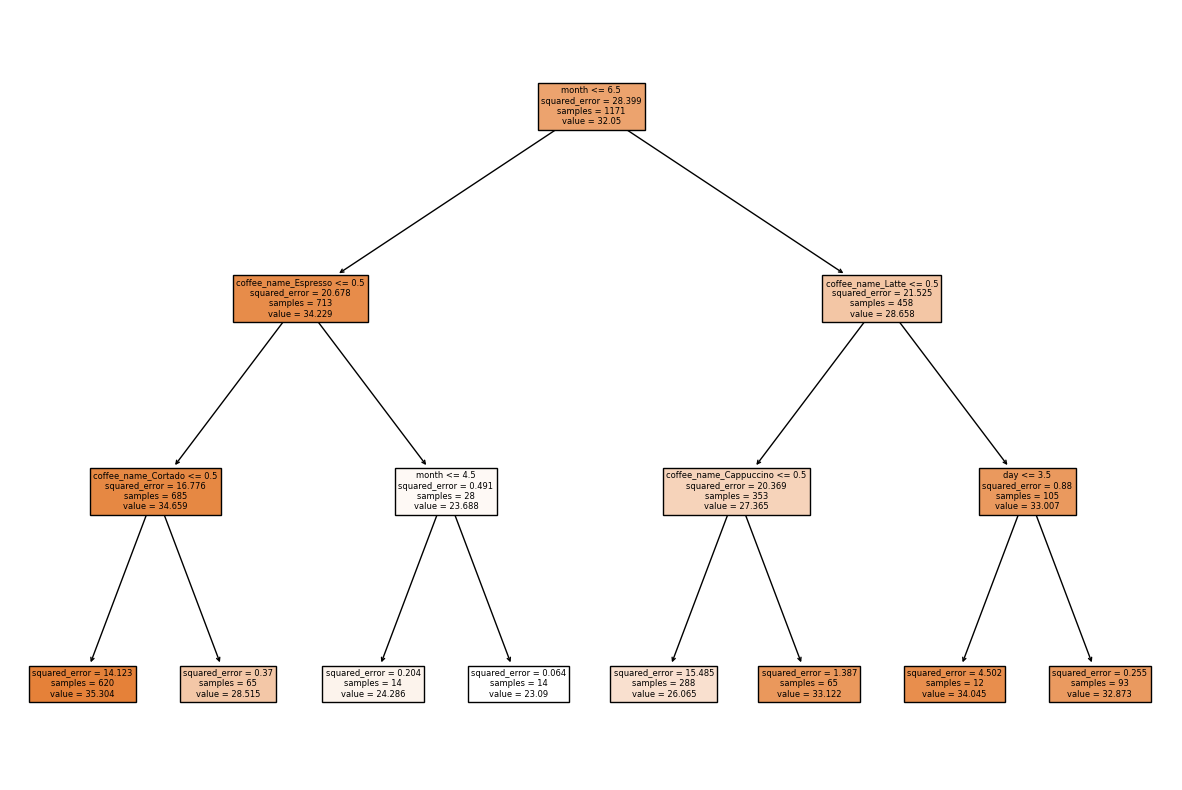

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
final = DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train, y_train)
plot_tree(final, feature_names=X.columns, filled = True)

Prosta linearna regresija

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr_model.intercept_)
print(lr_model.coef_)

33.59922877531683
[ 1.17698117 -1.28237381 -0.03610436  0.03666454  5.17343518 10.21310759
  9.66078456  0.09744738 -4.59573296  9.71735083  9.96599491]


In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
print('Mean absolute error:', mean_absolute_error(y_test, lr_pred))
print('Mean absoulte percentage error:', mean_absolute_percentage_error(y_test, lr_pred))

Mean absolute error: 0.9840607094184184
Mean absoulte percentage error: 0.03164795479956015


In [ ]:
print('Mean squared error:', mean_squared_error(y_test, lr_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, lr_pred))

Mean squared error: 1.4236873029516228
Coefficient of determination: 0.95


# 7. Tumačenje rezultata
Prililkom evaluacije Random Forest Regressor modela, tačnost evaluacije je malo manja od 96 procenata, dok vrednosti Mean Squared Error i R2 takođe ne pokazuju da je evaluacija i treniranje modela bilo baš najuspešnije, ali na osnovu vrednosti accuracy metrike, koja je blizu 96 procenata, evaluaciju modela možemo oceniti srednje uspešnom.Slično možemo zaključiti i za evaluaciju Decision Tree Regressor modela, tj. tačnosti modela kada govorimo o podacima za trening i testiranje takođe ne pokazuju najsjajnije rezultate.Međutim, kada smo pokrenuli proceduru podešavanja hiperparametara, koristeći GridSearchCV, videli smo da ta procedura može doneti tačnije rezultate.Nakon završetka procedura podešavanja hiperparametara, relevantne vrednosti(MSE, R2, MAPE) nam pokazuju bolju tačnost evaluacije modela.Prilikom evaluacije modela proste linearne regresije, vrednosti koje smo dobili nisu blizu željenih i pokazuju nam da model linearne regresije ne bi trebalo evaluirati nad našim skupom podataka.

Dodatak 6.4
Random Forest Regressor sa hiperparametrima


In [ ]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
predictions = forest.predict(X_train)
MSE = mean_squared_error(y_train, predictions)
RMSE = np.sqrt(MSE)
# Vrednost MSE
print(MSE)
# Vrednost RMSE
print(RMSE)

0.023726287070879582
0.15403339595970603


In [ ]:
errors = abs(predictions - y_train)
# Računamo Mean Absolute Percentage Error
mape = np.mean(100 * (errors/y_train))
# Izračunavamo preciznost(accuracy)
accuracy = 100 - mape
print('Accuracy:', accuracy, '%')

Accuracy: 99.89303205906212 %


Grid search algoritam

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7215861629788581 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.6443139454245849 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.46516457276731205 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.4482458914548322 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.5824247503974893 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.47791638676348636 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.5000559461964027 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.44064973722362955 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.5700091257329162 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.47793431017932436 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.4490365021893216 {'bootstrap': True,

In [ ]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=25, n_jobs=-1)

In [ ]:
# Izračunavamo performanse modela
grid_best = grid_search_forest.best_estimator_.predict(X_train)
errors = abs(grid_best - y_train)
# Računamo Mean Absolute Percentage Error
mape = np.mean(100 * (errors / y_train))
# Računamo preciznost
accuracy = 100 - mape
print('Najbolji model iz grid-search algoritma ima tačnost od:', round(accuracy, 2), '%')

Najbolji model iz grid-search algoritma ima tačnost od: 99.9 %


In [ ]:
grid_mse = mean_squared_error(y_train, grid_best)
print('Najbolji model iz grid-search algoritma ima vrednost MSE od:', grid_mse)
grid_rmse = np.sqrt(mse)
print('Najbolji model iz grid-search algoritma ima vrednost RMSE od:', round(grid_rmse, 2))

Najbolji model iz grid-search algoritma ima vrednost MSE od: 0.01863536259607169
Najbolji model iz grid-search algoritma ima vrednost RMSE od: 2.17


Randomized search algoritam

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [ ]:
# Pomoću random grid-search algoritma nalazimo najbolje hiperparametre

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

nan {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
nan {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.8130331542495632 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
nan {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
4.459001573401608 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.6972833284337727 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.6972140602255469 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
nan {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
4.464649012031049 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.8334227967973614 {'n_estimators': 110, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45}


In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [ ]:
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [ ]:
# Izračunavamo performanse ili metrike
random_best= rf_random.best_estimator_.predict(X_train)
errors = abs(random_best - y_train)
# Računamo mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Računamo preciznost(accuracy)
accuracy = 100 - mape
print('Najbolji model iz randomized search algoritma ima tačnost od:', round(accuracy, 2),'%')

Najbolji model iz randomized search algoritma ima tačnost od: 99.31 %


In [ ]:
# Računamo RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('Najbolji model iz randomized search algoritma ima tačnost od:', round(final_rmse, 2))

Najbolji model iz randomized search algoritma ima tačnost od: 0.38


In [ ]:
# Evaluacija modela

In [ ]:
final_model = rf_random.best_estimator_
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('Konačna vrednost RMSE je:', round(final_rmse, 2))

Konačna vrednost RMSE je: 0.84


In [ ]:
#Računamo konačne vrednosti mape i accuracy
errors = abs(final_pred - y_test)
# Računamo mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Računamo i štampamo accuracy(preciznost)
accuracy = 100 - mape
print('Preciznost najboljeg modela na test setu podataka je:', round(accuracy, 2),'%')

Preciznost najboljeg modela na test setu podataka je: 98.58 %


In [ ]:
# Feature importance

In [ ]:

importances = rf_random.best_estimator_.feature_importances_

feature_list = list(X.columns)

feature_importance= sorted(zip(importances, feature_list), reverse=True)

df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

print(df)

    importance                          feature
0     0.239160                            month
1     0.180080                coffee_name_Latte
2     0.155608           coffee_name_Cappuccino
3     0.127594             coffee_name_Espresso
4     0.069665        coffee_name_Hot Chocolate
5     0.063730              coffee_name_Cortado
6     0.051819  coffee_name_Americano with Milk
7     0.037289                             hour
8     0.034125                coffee_name_Cocoa
9     0.031524                              day
10    0.009408                        cash_type


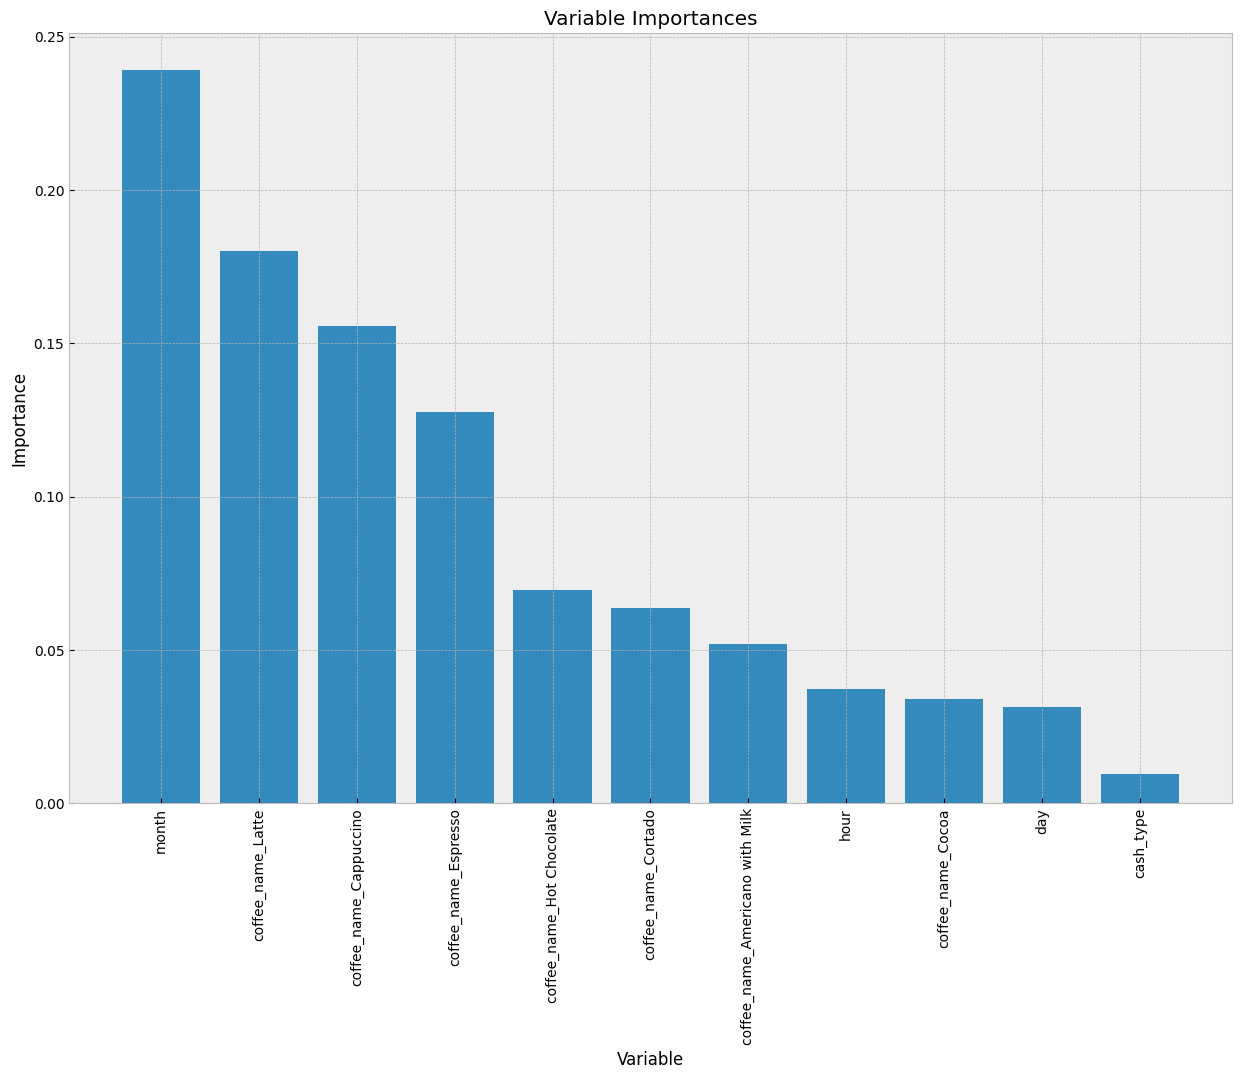

In [ ]:

plt.style.use('bmh')

x_values = list(range(len(feature_importance)))


plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
plt.xticks(x_values, feature, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');